In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import pickle
from mpl_toolkits import mplot3d

In [3]:
with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-12_session.pkl', 'rb') as inp:
    session512 = pickle.load(inp)

In [4]:
rates = session512.data['rates']
angles = session512.data['angles']
coords = session512.data['coords']

In [8]:
new_rates = []
new_angles = []
new_coords = []

for i in range(len(rates)):
    size_we_want = int(rates[i].shape[0] / 2)
    
    temp_rate = rates[i][:size_we_want,:]
    new_rates.append(temp_rate)
    
    temp_angle = angles[i][:size_we_want,:]
    new_angles.append(temp_angle)
    
    temp_coord = coords[i][:size_we_want,:, :]
    new_coords.append(temp_coord)
           

In [10]:
rates[0].shape

(2962, 32)

In [9]:
new_rates[0].shape

(1481, 32)

In [11]:
new_angles[0].shape

(1481, 7)

In [12]:
coords[0].shape

(2962, 17, 3)

In [20]:
dataset_x = np.random.rand(3,2)
modifier = np.random.rand(3,3)

dataset_y = np.dot(modifier, dataset_x)

In [21]:
X = dataset_x
Y = dataset_y

[[1.         0.36449102]
 [0.36449102 1.        ]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
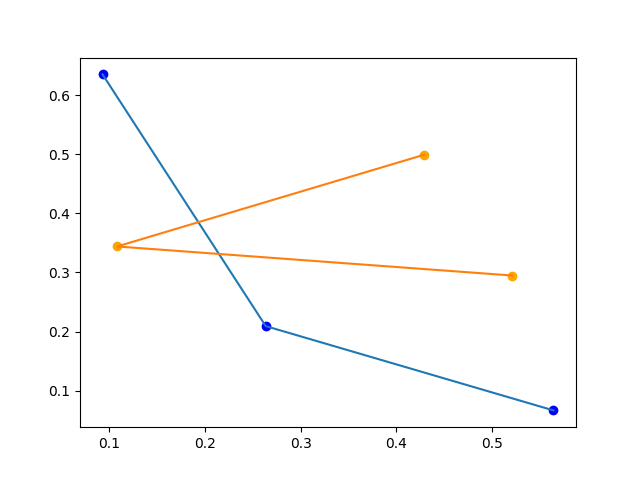

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,0], X[:,1])
ax.plot(Y[:,0], Y[:,1])

ax.scatter(X[:,0], X[:,1], c='blue')
ax.scatter(Y[:,0], Y[:,1],c='orange')


print(np.corrcoef(X[:,0], Y[:,0]))

In [23]:
scaler = StandardScaler()
sca_X = scaler.fit_transform(X)
sca_Y = scaler.fit_transform(Y)

[[1.         0.99994357]
 [0.99994357 1.        ]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
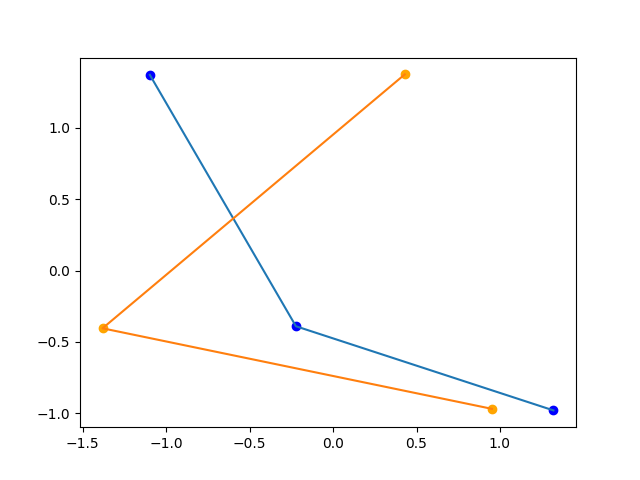

In [24]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(sca_X[:,0], sca_X[:,1])
ax1.plot(sca_Y[:,0], sca_Y[:,1])

ax1.scatter(sca_X[:,0], sca_X[:,1], c='blue')
ax1.scatter(sca_Y[:,0], sca_Y[:,1],c='orange')

print(np.corrcoef(sca_X[:,1], sca_Y[:,1]))

In [25]:
ccaXY = CCA(n_components=2, scale=False)
sca_X_cca, sca_Y_cca = ccaXY.fit_transform(sca_X, sca_Y)

[[1. 1.]
 [1. 1.]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
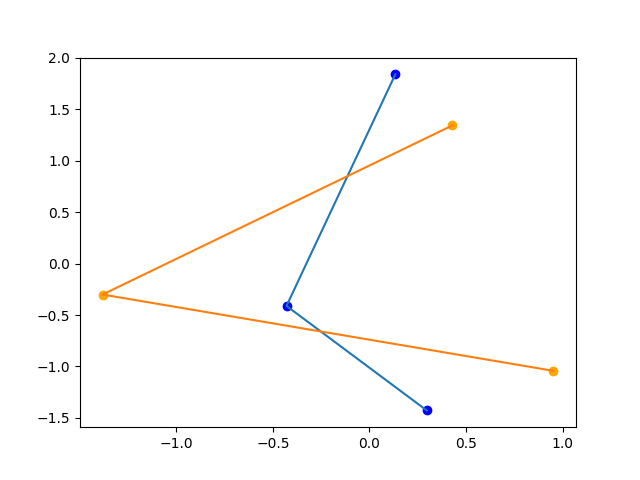

In [26]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(sca_X_cca[:,0], sca_X_cca[:,1])
ax2.plot(sca_Y_cca[:,0], sca_Y_cca[:,1])

ax2.scatter(sca_X_cca[:,0], sca_X_cca[:,1], c='blue')
ax2.scatter(sca_Y_cca[:,0], sca_Y_cca[:,1],c='orange')

print(np.corrcoef(sca_X_cca[:,0], sca_Y_cca[:,0]))

In [16]:
fake_sca_X = ccaXY.inverse_transform(sca_Y_cca)

[[1.         0.40853085]
 [0.40853085 1.        ]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
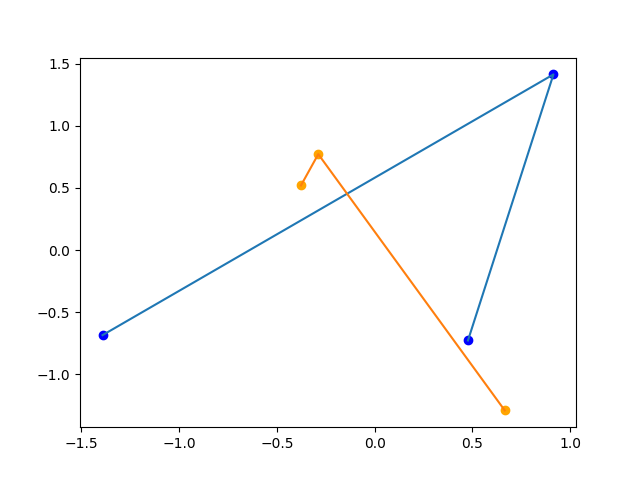

In [19]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.plot(sca_X[:,0], sca_X[:,1])
ax3.plot(fake_sca_X[:,0], fake_sca_X[:,1])

ax3.scatter(sca_X[:,0], sca_X[:,1],c='blue')
ax3.scatter(fake_sca_X[:,0], fake_sca_X[:,1],c='orange')

print(np.corrcoef(sca_X[:,0], fake_sca_X[:,0]))

In [116]:
a=[]
b=[]
c=[]
for i in range(2):
    a.append(np.corrcoef(sca_X[:,i], sca_Y[:,i])[0,1])
    b.append(np.corrcoef(sca_X_cca[:,i], sca_Y_cca[:,i])[0,1])
    c.append(np.corrcoef(sca_X[:,i], fake_sca_X[:,i])[0,1])

<BarContainer object of 3 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
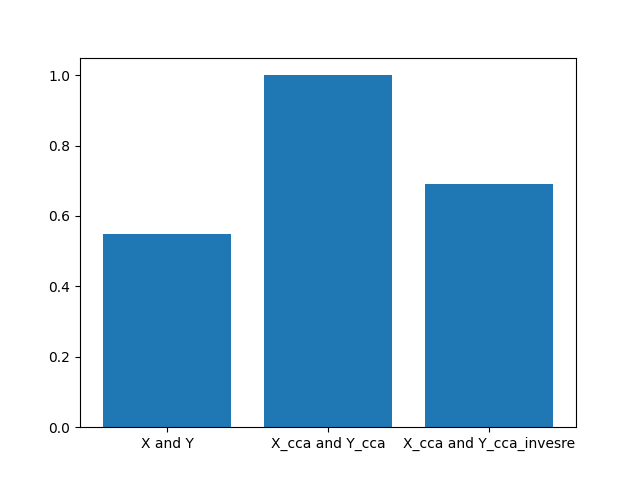

In [123]:
fig5 = plt.figure()
ax5= fig5.add_subplot(111)

names = ['X and Y', 'X_cca and Y_cca', 'X_cca and Y_cca_invesre']
height = [a[0], b[0], c[0]]
ax5.bar(names, height)
    

In [107]:
cca12 = CCA(n_components=2, scale=False)
cca12.fit(scaled_dataset1, scaled_dataset2)
scaled_dataset1_cca, scaled_dataset2_cca = cca12.transform(scaled_dataset1, scaled_dataset2)

[[1. 1.]
 [1. 1.]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
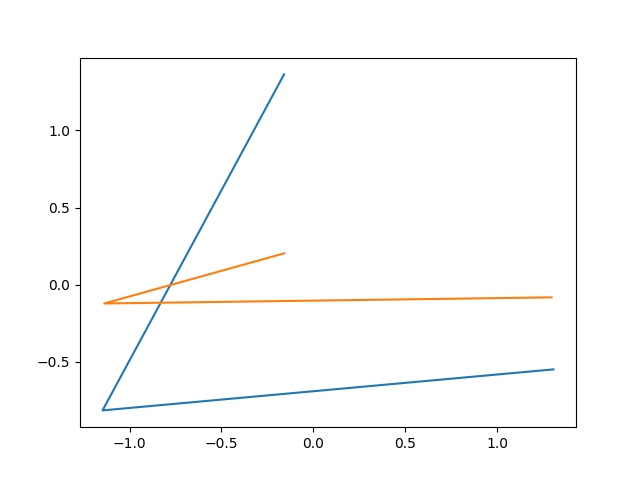

In [108]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(scaled_dataset1_cca[:,0], scaled_dataset1_cca[:,1])
ax2.plot(scaled_dataset2_cca[:,0], scaled_dataset2_cca[:,1])

print(np.corrcoef(scaled_dataset1_cca[:,1], scaled_dataset2_cca[:,1]))

In [109]:
fake_dataset1 = cca12.inverse_transform(scaled_dataset2_cca)

[[1.         0.70373936]
 [0.70373936 1.        ]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
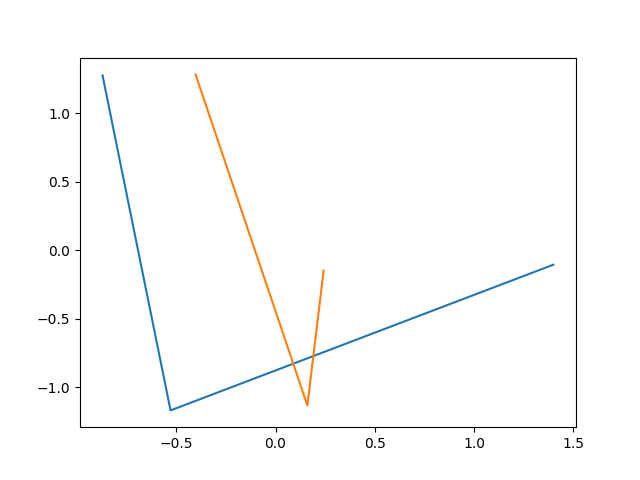

In [112]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.plot(scaled_dataset1[:,0], scaled_dataset1[:,1])
ax3.plot(fake_dataset1[:,0], fake_dataset1[:,1])

print(np.corrcoef(scaled_dataset1[:,0], fake_dataset1[:,0]))

In [45]:
cca12.x_rotations_

array([[ 0.40822016,  0.24897077,  0.79202077],
       [ 0.91288302, -0.46054528, -0.27476341],
       [ 0.00094625,  0.90939   , -0.57842083]])

In [46]:
cca12.y_rotations_

array([[ 1.00000000e+00, -8.59264170e-01, -5.03285950e-01],
       [ 1.45874224e-16,  1.00000000e+00, -5.31659137e-01],
       [ 3.71395857e-17,  2.46829222e-16,  1.00000000e+00]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
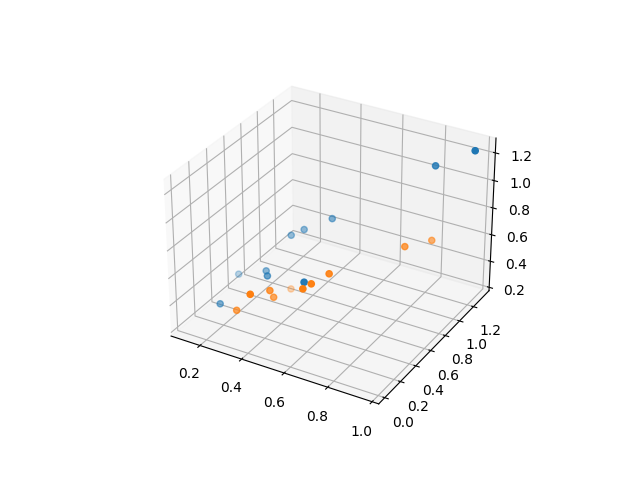

In [39]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
#ax.scatter3D(dataset1_cca[:,0])

ax1.scatter3D(dataset2[:,0], dataset2[:,1], dataset2[:,2])
#ax.scatter3D(dataset1_cca[:,0], dataset1_cca[:,1], dataset1_cca[:,2], cmap='Blues')
#ax.scatter(dataset1_cca[:,1], dataset2_cca[:,1])
ax1.scatter3D(fake_dataset2[:,0], fake_dataset2[:,1], fake_dataset2[:,2])
#ax.scatter3D(dataset2_cca[:,0], dataset2_cca[:,1], dataset2_cca[:,2])

#np.corrcoef(dataset1_cca[:, 1], dataset2_cca[:, 1])

In [29]:
cca12.coef_

array([[ 1.12907009e-01,  2.04125535e-01,  4.24337439e-01],
       [ 2.52488491e-01,  1.10228791e-01,  1.15039590e-01],
       [ 2.61716406e-04,  3.09793871e-01, -3.03108777e-02]])

In [ ]:
modifier

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
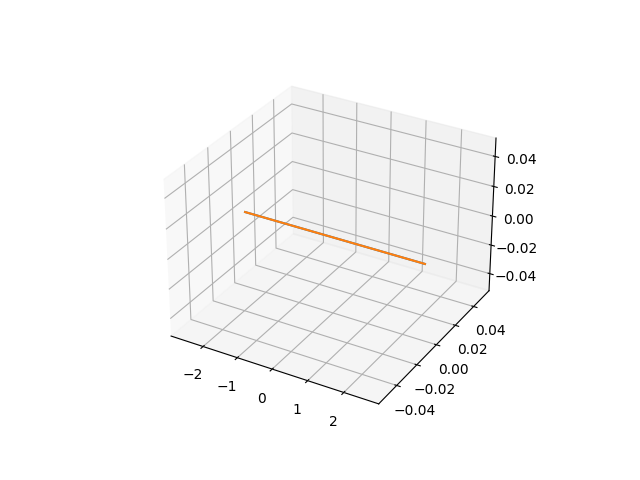

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_c[:,0], X_c[:,1], X_c[:,2])
ax.plot(Y_c[:,0], Y_c[:,1], Y_c[:,2])

In [24]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=3)
cca.fit(dataset1, dataset2)


/home/diya/anaconda3/envs/rat-fes/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 1
  warnings.warn(f"Y residual is constant at iteration {k}")


CCA(n_components=3)

In [25]:
X_c, Y_c = cca.transform(dataset1, dataset2)

In [34]:
np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1., 1.],
       [1., 1.]])

In [4]:
h_angle, vaf_angle, x_angle, y_angle = session519.decode_angles()

In [81]:
rates, angles = session519.data['rates'], session519.data['angles']

In [84]:
h_angle, vaf_angle, x_angle, y_angle = session519.decode_angles()

[   -1  1601  5024  8127 11430 14533]


In [126]:
check = np.ones((1,rates.shape[1])) * -1

In [127]:
import numpy.ma as ma

mx = ma.masked_array(rates, rates==check)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [138]:
rates==check

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [140]:
rates[rates~=check]

SyntaxError: invalid syntax (<ipython-input-140-f72f5e943467>, line 1)

In [ ]:
np.average(vaf_angle, 1)

array([0.12765898, 0.26542302, 0.15700302, 0.25442188, 0.19374881,
       0.05012257, 0.17620847])

In [1]:
import numpy as np

import numpy.ma as ma

x = np.array([1, 2, 3, -1, 5])

In [3]:
mx = ma.masked_array(x, mask=[0, 0, 0, 1, 0])

In [7]:
np.argmax(mx)

4

In [2]:
#crop for annie-5-6
#crop=[(33, 120), (10, 115), (15, 208), (10, 165)]

In [ ]:
#crop for annie-5-10
#crop = [(90,155), (0,120), (0, 167), (7, 220)]

In [5]:
#crop for annie-5-12
crop512 = [(12,160),(10,155), (9, 210), (12, 230)]


In [6]:
#crop for annie 5-19
#crop519 = [(60, 140), (14,185), (20, 175), (15,  180), (10, 165)]

In [ ]:
rate, kin = session512.process(crop512, threshold_multiplier=3.0)

In [4]:
rates = session519.data['rates']
kins = session519.data['angles']

In [5]:
def format_data(x, y, N=10):
    stitch_x = np.ones((1, x.shape[1]))*-1
    stitch_y = np.ones((1, y.shape[1]))*-1

    #this is borderline incomprehensible code, but this just returns an array
    #that contains the indexes for splitting the data
    stitch_idx = np.insert(np.unique(np.where(x==stitch_x)[0]), 0,-1)

    x_list = []
    y_list = []

    x_output_list = []
    y_output_list = []
    for i in range(np.size(stitch_idx)-1):
        x_list.append(x[stitch_idx[i]+1:stitch_idx[i+1], :])
        y_list.append(y[stitch_idx[i]+1:stitch_idx[i+1], :])
        
    for j in range(len(x_list)):
        x_ = x_list[j]
        y_ = y_list[j]

        print(x_.shape, y_.shape)

        temp_x_list = []
        temp_y_list = []
        for i in range(np.size(x_, 0) -N):
            temp = x_[i:i+N, :]
            temp = temp.reshape((np.size(temp)))
            temp_x_list.append(temp)
            if y_.ndim == 2:
                temp_y_list.append(y[i+N-1, :])
            elif y_.ndim == 1:
                temp_y_list.append(y[i+N-1])

            x_output_list.append(np.asarray(temp_x_list))
            y_output_list.append(np.asarray(temp_y_list))

    return np.vstack(x_output_list), np.vstack(y_output_list)
        
        




In [16]:
f_rates, f_kins = format_data(rates, kins)

In [14]:
f_rates.shape

AttributeError: 'list' object has no attribute 'shape'

In [8]:
stitch_x = np.ones((1, rates.shape[1]))*-1  

In [6]:
rates_cut = rates[1000:,:]
kins_cut = kins[1000:,:]

In [22]:
stitch_idx = np.insert(np.unique(np.where(rates_cut==stitch_x)[0]),0,-1)

In [18]:
np.size(stitch_idx)

6

In [23]:
x_list = []
y_list = []

for i in range(np.size(stitch_idx)-1):
    x_list.append(rates_cut[stitch_idx[i]+1:stitch_idx[i+1], :])
    y_list.append(kins_cut[stitch_idx[i]+1:stitch_idx[i+1],:])
    

In [ ]:
for j in range(len(x_list)):
    x_ = x_list[j]
    y_ = y_list[j]
    
    temp_x_list=[]
    temp_y_list=[]
    
    for i in range(np.size(x_, 0) - 10):
        print(x_.shape)

In [ ]:
fx, fy = format_data(rates, kins)

(1601, 32) (1601, 7)
(3422, 32) (3422, 7)


In [57]:
fx[0:100,:]

array([[200., 180., 160., ..., 120.,  80.,  80.],
       [200., 180., 160., ..., 120.,  80.,  80.],
       [120., 100., 140., ..., 140., 100., 140.],
       ...,
       [240., 220., 240., ...,   0.,  20.,   0.],
       [240., 260., 260., ...,  60.,  60.,  60.],
       [100., 160., 140., ..., 100.,  80., 100.]])

In [12]:
session519.data['rates_fs']

24414.0625

In [ ]:
testone = session519.kin_data[0]['coords']
testtwo = session519.kin_data[1]['coords']

In [ ]:
testone.shape

In [ ]:
love = np.ones((1, testone.shape[1], testone.shape[2])) * -1

In [ ]:
np.vstack((testone, love))

In [ ]:
rate.shape

In [ ]:
stitch_break = np.ones((1, rate.shape[1])) * -1

In [ ]:
np.vstack((rate, stitch_break))

In [ ]:
h, vaf, xtest, ytest = session519.decode_angles()

In [ ]:
np.average(vaf,axis=1)

In [ ]:
plot_wiener_filter_predic(xtest, ytest[:,1], h[:,1])

In [ ]:
temp = session519.get_gait_indices()

In [ ]:
session519.avg_gait_samples

In [ ]:
rate_gait, kin_gait = session519.divide_into_gaits(rate, kin)

In [ ]:
df = session519.neuron_tuning(rate_gait)

In [ ]:
plot_raster(df)

In [ ]:
rates, kins = session510.stitch_data(session510.rate_list, session510.angle_list)

In [ ]:
session510.get_gait_indices()

In [ ]:
X_gait, Y_gait = session510.divide_into_gaits(rates, kins)

In [ ]:
np.array(X_gait).shape, np.array(Y_gait).shape

In [ ]:
session510.neuron_tuning(X_gait)

In [ ]:
df = session510.norm_sorted_neurons

In [ ]:
df.columns

In [ ]:
plot_raster(session510.norm_sorted_neurons)

In [ ]:
rates_pca_3, pca_output = apply_PCA(rates.T, 3)

In [ ]:
rates_pca_3 = rates_pca_3.T
print(rates_pca_3.shape)

In [ ]:
gait_rates_3, nada = session.divide_into_gaits(rates_pca_3, angles)

In [ ]:
gait_rates_3 = np.array(gait_rates_3)

In [ ]:
avg_gait_rates_3 = np.average(gait_rates_3, axis=0)

In [ ]:
np.vstack((avg_gait_rates_3.T, avg_gait_rates_3[:,0].T)).T.shape

In [ ]:
gait_state_space(gait_rates_3)

In [ ]:
rates_PCA.shape

In [ ]:
fig, ax = plt.subplots()
ax.plot(pca_output.explained_variance_ratio_)

In [ ]:
ret = session.process_toe_height()

In [ ]:
h_toe, vaf_toe, x_toe, y_toe = session.decode_toe_height()

In [ ]:
predic_y_toe = test_wiener_filter(x_toe, h_toe)
print(vaf(y_toe, predic_y_toe))
fig1 = plt.figure()
ax1=fig1.add_subplot(111)
ax1.plot(y_toe)
ax1.plot(predic_y_toe)

In [ ]:
session.divide_into_gaits()

In [ ]:
ret = session.neuron_tuning()

In [ ]:
raster(ret)

In [ ]:
avg_gait_array.shape

In [ ]:
np.sort(np.argmax(avg_gait_array, axis=1))

In [ ]:
h, vaffy, test_x, test_y = session.decode_angles()

In [ ]:
avg_vaf = np.average(vaffy, axis=1)
predic_y = test_wiener_filter(test_x, h)
print(avg_vaf)

In [ ]:
fig0 = plt.figure()
ax0=fig0.add_subplot(111)
ax0.plot(test_y[:,3])
ax0.plot(predic_y[:,3])

print(vaf(test_y[:,3], predic_y[:,3]))

In [ ]:
session.divide_into_gaits()

In [ ]:
np.array(session.rate_gait).shape

In [ ]:
len(session.angle_gait)

In [ ]:
crop1 = (5,180)
crop2 = (31,227)
crop3 = (5,200)
crop4 = (5,150)

crop_list = []
crop_list.extend((crop1, crop2, crop3, crop4))

In [ ]:
sess1 = CortProcessor('/home/diya/Documents/rat-fes/data/rat-t/session1')

In [ ]:
rates, kins = sess1.process(crop_list)

In [ ]:
a, b, c, d = sess1.linear_decoder(rates,kins)

In [ ]:
np.average(b, axis=1)

In [ ]:
path = '/home/diya/Documents/rat-fes/data/rat-annie/5-6-22/annie2-220506-133311/live_videos'

In [ ]:
for file_name in os.listdir(path):
    if file_name.endswith('.npy'):
        print(file_name)
    


In [ ]:
file_name.split('-')